In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 一、简单二分类

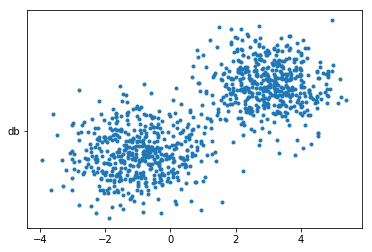

In [3]:
#数据准备
#以（3，2）、（7，9）为核心生成两组随机产生、随机排列的3D数据,
#其中前前两组为（x1，x2）点位，后一组为0、1的分类数据
#每组数据500个，合计1000个数据
d1 = np.array([np.random.normal(3,1,500),np.random.normal(2,1,500),np.zeros(500)]).T
d2 = np.array([np.random.normal(-1,1,500),np.random.normal(-1,1,500),np.ones(500)]).T
#合并两组数据
d = np.vstack([d1,d2]) 
#d.shape=(1000,3)
#打乱顺序
np.random.shuffle(d)
#画图
plt.plot(d[:,0],d[:,1],'.','db')

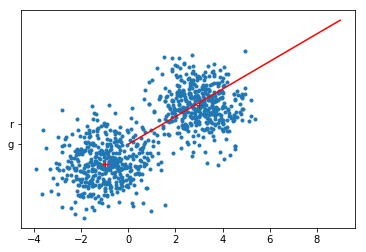

In [4]:
#开始分类
#取前900的数据作为训练数据，后100的数据作为测试数据
train_data = d[:900]  #shape (900,3)
test_data = d[900:]   #shape (100,3)
#计算0、1两类数据的均值向量u0、u1
data0 = train_data[ train_data[:,2]==0 ][:,:2]
data1 = train_data[ train_data[:,2]==1 ][:,:2]
u0 = np.mean(data0,axis=0)
u1 = np.mean(data1,axis=0)
#计算0、1两类数据的协方差向量s0,s1
s0 = np.array([np.dot(np.array([x-u0]).T,np.array([x-u0])) for x in data0[:]]).mean(axis=0)
s1 = np.array([np.dot(np.array([x-u1]).T,np.array([x-u1])) for x in data1[:]]).mean(axis=0)
sw = s0 + s1
sw_1 = np.linalg.inv(sw)/np.linalg.det(sw)
w = np.dot(sw_1,np.array([u0-u1]).T)

x1 = np.arange(10)
x2 = x1*(w[1]/w[0])
#plt.plot(x1,x2,'-','r')
plt.plot(train_data[:,0],train_data[:,1],'.','g')
plt.plot(u0[0],u0[1],'r+','r')
plt.plot(u1[0],u1[1],'r+','r')
plt.plot(x1,x2,'r-',)

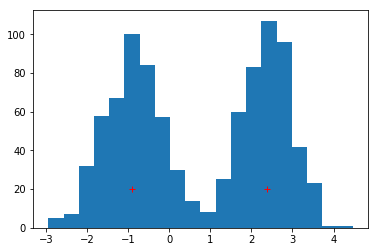

In [5]:
#所有样本投影计算，及其直方图
x_lenth=np.dot(train_data[:,:2] , w)
plt.hist( x_lenth, bins=20)
u0_len = np.dot(u0, w)
u1_len = np.dot(u1, w)
plt.plot(u0_len,20,'r+')
plt.plot(u1_len,20,'r+')

In [6]:
#计算train_data数据的准确度
data = train_data
r_train = np.zeros(len(data))
x_len=np.dot(data[:,:2] , w)
dis0 = np.abs(x_len - u0_len)
dis1 = np.abs(x_len - u1_len)
diff = dis0 - dis1
r_train = r_train.reshape(data.shape[0],1)
r_train[diff > 0] = 1
rate = np.abs(r_train - train_data[:,2].reshape(900,1)).sum()/len(r_train)
print('训练数据错误率：',rate)

data = test_data
r_train = np.zeros(len(data))
x_len=np.dot(data[:,:2] , w)
dis0 = np.abs(x_len - u0_len)
dis1 = np.abs(x_len - u1_len)
diff = dis0 - dis1
r_train = r_train.reshape(data.shape[0],1)
r_train[diff > 0] = 1
rate = np.abs(r_train - data[:,2].reshape(data.shape[0],1)).sum()/len(r_train)
print('测试数据错误率：',rate)



训练数据错误率： 0.008888888888888889
测试数据错误率： 0.0


事实上，LDA算法本身的参数、模型对于单个数据集分类结果的准确率是唯一的。
可以发现，当调整样本数据，使得样本数据的中心点更接近，或是样本方差更大，会有效降低预测结果。

也就印证了教材上的一句话：**预测结果的好坏不取决于算法，而是取决于样本数据**

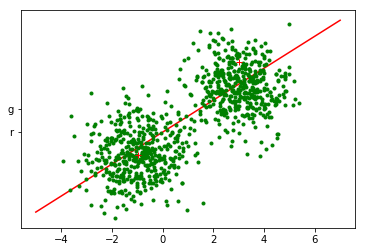

In [53]:
#引用自 https://my.oschina.net/u/3590872/blog/1239889 的LDA源代码
#该代码直接使用np.mat将数据转化为矩阵，直接计算，代码简洁
#开始分类
#取前900的数据作为训练数据，后100的数据作为测试数据
train_data = d[:900]  #shape (900,3)
test_data = d[900:]   #shape (100,3)
#计算0、1两类数据的均值向量u0、u1
data0 = np.mat(train_data[ train_data[:,2]==0 ][:,:2])
data1 = np.mat(train_data[ train_data[:,2]==1 ][:,:2])
u0 = data0.mean(0)
u1 = data1.mean(0)
#计算0、1两类数据的协方差向量s0,s1
s0 = (data0 - u0).T * (data0 - u0)
s1 = (data1 - u1).T * (data1 - u1)
sw = s0 + s1

w = (sw.I * (u0 - u1).T)
w_ = np.array(w_)

## w 的结果可以表示直线，但是这样的表示方法有问题
x1 = np.linspace(-5,7)
x2 = x1*(w_[1]/w_[0])
plt.plot(x1,x2,'r-','r')
plt.plot(train_data[:,0],train_data[:,1],'g.','g')
#画出两个分类的中心点
x0,y0 = np.array(u0)[0][0],np.array(u0)[0][1]
x1,y1 = np.array(u1)[0][0],np.array(u1)[0][1]
plt.plot(x0,x0,'r+','r')
plt.plot(x1,x1,'r+','r')

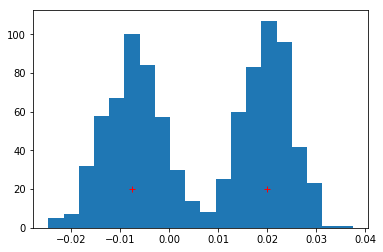

In [82]:
#计算投影数据
r_train = np.mat(train_data)
rr = r_train[:,:2] * w
plt.hist(rr, bins=20)
plt.plot(np.array(u0 * w)[0][0],20, 'r+')
plt.plot(np.array(u1 * w)[0][0],20, 'r+')

In [68]:
diff = np.abs(rr - u0 * w) - np.abs(rr - u1 * w)
rlt = np.where(diff>0 , 1,0)
rate_train = (rlt - r_train[:,2]).sum() / r_train.shape[0]

rr1 = np.mat(test_data[:,:2]) * w
diff = np.abs(rr1 - u0 * w) - np.abs(rr1 - u1 * w)
rlt = np.where(diff>0 , 1,0)
rate_test = (rlt - np.mat(test_data)[:,2]).sum() / r_train.shape[0]
print('训练数据错误率：',rate_train)
print('测试数据错误率：',rate_test)

训练数据错误率： 0.0022222222222222222
测试数据错误率： 0.0


通过比较发现，使用np.mat直接从矩阵运算后，直接从直线、平均点、样本点的图形上看，好像不伦不类，但是跑出的结果却比第一种方法要好。
下一步就是要将算法拓展到多维度、多种类运算！！！

In [88]:
aaa = np.mat(np.random.rand(16).reshape(4,4))
aaa.I

matrix([[ 3.17692099, -5.34745311, -2.85253926,  1.96861567],
        [ 0.01143795, -4.57880023,  0.24321528,  2.75352532],
        [-1.04497755,  8.03829244,  2.36789606, -4.97211772],
        [-0.3300002 , -0.7219762 , -0.6032809 ,  1.93668157]])

In [94]:
xxx,yyy,zzz = np.linalg.svd(aaa)
np.diag(yyy) 

array([[2.23688236, 0.        , 0.        , 0.        ],
       [0.        , 0.67697928, 0.        , 0.        ],
       [0.        , 0.        , 0.30801775, 0.        ],
       [0.        , 0.        , 0.        , 0.07734414]])

In [96]:
np.mat(np.diag(yyy)).I

matrix([[ 0.44705078,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  1.47715007,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  3.2465662 ,  0.        ],
        [ 0.        ,  0.        ,  0.        , 12.9292278 ]])

In [102]:
np.linalg.inv(np.diag(yyy))

array([[ 0.44705078,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.47715007,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  3.2465662 ,  0.        ],
       [ 0.        ,  0.        ,  0.        , 12.9292278 ]])

# 二、多分类情况：